In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


In [2]:
import nltk
from wordcloud import WordCloud

### Loading the Dataset

In [3]:
data_fake = pd.read_csv(r"C:/Users/akash/Downloads/News-_dataset/Fake.csv")
data_true = pd.read_csv(r"C:/Users/akash/Downloads/News-_dataset/True.csv")

In [4]:
data_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
data_fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

Visualizing the domains of news available in our dataset

<Axes: xlabel='subject', ylabel='count'>

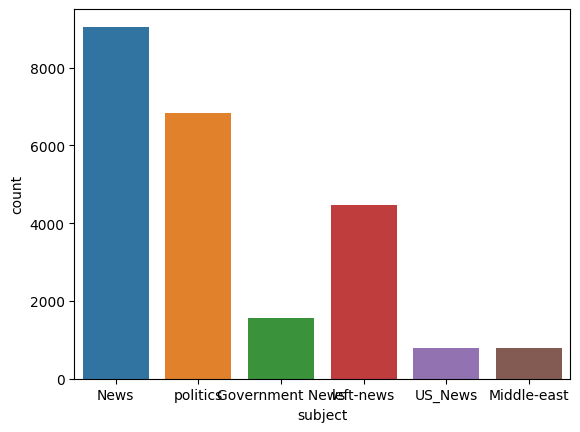

In [6]:
sns.countplot(x='subject',data=data_fake)

<Axes: xlabel='subject', ylabel='count'>

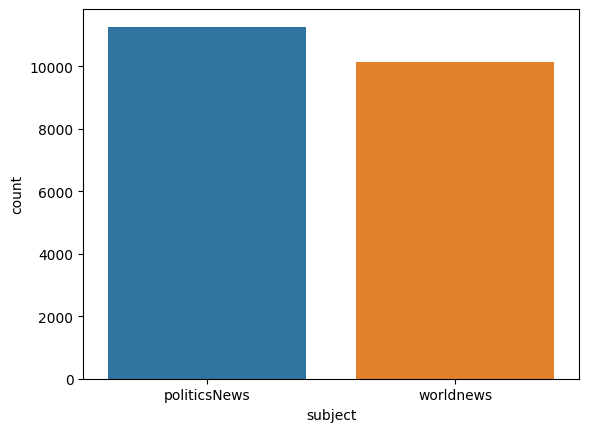

In [7]:
sns.countplot(x='subject',data=data_true)

### Wordcloud

In [8]:
text=' '.join(data_fake['text'].tolist())

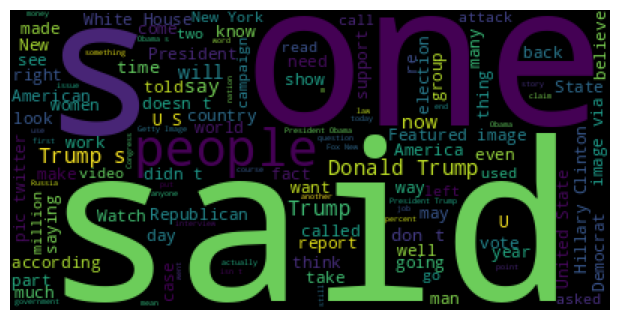

In [9]:
wordcloud=WordCloud().generate(text)
fig=plt.figure(figsize=(6,6))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.savefig('Fake.png')
plt.show()



In [10]:
text=' '.join(data_true['text'].tolist())

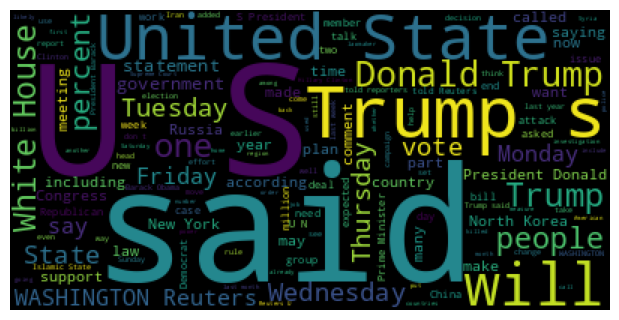

In [11]:
wordcloud=WordCloud().generate(text)
fig=plt.figure(figsize=(6,6))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.savefig('True.png')
plt.show()



#### Removing Reuters word as it contains bias as previously explained in ML source codes

In [12]:
unknown_pub=[]
for index,row in enumerate(data_true.text.values):
    try:
        record=row.split('-',maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown_pub.append(index)

In [13]:
len(unknown_pub)

222

In [14]:
data_true.iloc[unknown_pub]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [15]:
data_true.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [16]:
data_true=data_true.drop(8970,axis=0)

In [17]:
pub=[]
tmp_text=[]
for index,row in enumerate(data_true.text.values):
    if index in unknown_pub:
        tmp_text.append(row)
        pub.append('Unknown')
    else:
        record=row.split('-',maxsplit=1)
        pub.append(record[0].strip())
        tmp_text.append(record[1].strip())
        

In [18]:
data_true['Publisher']=pub
data_true['text']=tmp_text

In [19]:
data_true.shape

(21416, 5)

In [20]:
data_true.head()

,title,text,subject,date,Publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


### NaN values for text

In [21]:
empty_index_fake=[index for index,text in enumerate(data_fake.text.tolist()) if str(text).strip()==""]

In [22]:
data_fake.iloc[empty_index_fake]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


data_true['text']=data_true['title']+" "+data_true['text']
data_fake['text']=data_fake['title']+" "+data_fake['text']

In [23]:
data_true = data_true.drop(['text', 'subject', 'date'], axis = 1)
data_fake = data_fake.drop(['text', 'subject', 'date'], axis = 1)

In [24]:
data_true['title']=data_true['title'].apply(lambda x: str(x).lower())

data_fake['title']=data_fake['title'].apply(lambda x: str(x).lower())

In [25]:
data_fake

,title
0,donald trump sends out embarrassing new year’...
1,drunk bragging trump staffer started russian ...
2,sheriff david clarke becomes an internet joke...
3,trump is so obsessed he even has obama’s name...
4,pope francis just called out donald trump dur...
...,...
23476,mcpain: john mccain furious that iran treated ...
23477,justice? yahoo settles e-mail privacy class-ac...
23478,sunnistan: us and allied ‘safe zone’ plan to t...
23479,how to blow $700 million: al jazeera america f...


In [26]:
data_fake["class"] = 0
data_true["class"] = 1

In [27]:
data_true=data_true[['title','class']]
data_fake=data_fake[['title','class']]

In [28]:
data_true.head()

,title,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


In [29]:
df = pd.concat([data_fake, data_true], axis = 0)

In [30]:
df

,title,class
0,donald trump sends out embarrassing new year’...,0
1,drunk bragging trump staffer started russian ...,0
2,sheriff david clarke becomes an internet joke...,0
3,trump is so obsessed he even has obama’s name...,0
4,pope francis just called out donald trump dur...,0
...,...,...
21412,'fully committed' nato backs new u.s. approach...,1
21413,lexisnexis withdrew two products from chinese ...,1
21414,minsk cultural hub becomes haven from authorities,1
21415,vatican upbeat on possibility of pope francis ...,1


### PreProcessing Our combined dataset

In [31]:
def wordopt(text):
    text = re.sub('[^A-Za-z0-9]+', ' ',text)
    text = re.sub(' (.*)reuters(.*)','',text)
    return text

In [32]:
df['title'] = df['title'].apply(wordopt)

In [33]:
df

,title,class
0,donald trump sends out embarrassing new year ...,0
1,drunk bragging trump staffer started russian ...,0
2,sheriff david clarke becomes an internet joke...,0
3,trump is so obsessed he even has obama s name...,0
4,pope francis just called out donald trump dur...,0
...,...,...
21412,fully committed nato backs new u s approach o...,1
21413,lexisnexis withdrew two products from chinese ...,1
21414,minsk cultural hub becomes haven from authorities,1
21415,vatican upbeat on possibility of pope francis ...,1


# Now we can start our Exploratory Data Analysis

### Word2vec

In [53]:
import gensim
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [35]:
y=df['class'].values

In [36]:
X=[d.split() for d in df['title'].tolist()]

In [37]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X,vector_size=DIM,window=10,min_count=1)

In [38]:
w2v_model.wv.most_similar('modi')

[('region', 0.988642156124115),
 ('india', 0.9847012758255005),
 ('toxic', 0.9846691489219666),
 ('diversity', 0.9825177192687988),
 ('target', 0.9808734655380249),
 ('deepening', 0.9808475375175476),
 ('popularity', 0.9799893498420715),
 ('kuczynski', 0.9797495007514954),
 ('extremism', 0.9795282483100891),
 ('agenda', 0.9790866374969482)]

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)
X=tokenizer.texts_to_sequences(X)

In [41]:
[len(x) for x in X]

[13,
 8,
 15,
 15,
 11,
 13,
 15,
 15,
 17,
 16,
 12,
 17,
 13,
 14,
 13,
 13,
 13,
 10,
 14,
 9,
 16,
 14,
 15,
 18,
 15,
 14,
 13,
 16,
 14,
 11,
 14,
 9,
 13,
 11,
 15,
 13,
 14,
 14,
 13,
 13,
 13,
 16,
 14,
 18,
 20,
 11,
 11,
 14,
 13,
 14,
 12,
 19,
 16,
 17,
 10,
 16,
 16,
 14,
 13,
 12,
 16,
 18,
 12,
 16,
 14,
 14,
 13,
 15,
 15,
 9,
 18,
 13,
 15,
 16,
 18,
 12,
 12,
 17,
 11,
 16,
 9,
 12,
 17,
 12,
 16,
 15,
 12,
 17,
 15,
 15,
 17,
 15,
 14,
 12,
 16,
 11,
 15,
 19,
 14,
 15,
 13,
 11,
 17,
 13,
 12,
 9,
 17,
 16,
 13,
 12,
 8,
 11,
 14,
 16,
 15,
 13,
 12,
 12,
 13,
 14,
 14,
 10,
 15,
 15,
 15,
 9,
 13,
 15,
 13,
 14,
 14,
 13,
 17,
 15,
 17,
 14,
 14,
 17,
 9,
 15,
 12,
 14,
 19,
 16,
 18,
 14,
 11,
 14,
 14,
 11,
 14,
 18,
 16,
 16,
 12,
 11,
 10,
 11,
 14,
 21,
 13,
 16,
 9,
 14,
 11,
 18,
 16,
 14,
 19,
 17,
 20,
 14,
 13,
 14,
 12,
 14,
 11,
 14,
 12,
 15,
 14,
 9,
 13,
 16,
 12,
 15,
 15,
 16,
 17,
 16,
 15,
 15,
 15,
 11,
 17,
 13,
 11,
 15,
 14,
 17,
 14,
 11,
 

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.360e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.200e+01,
        0.000e+00, 0.000e+00, 0.000e+0

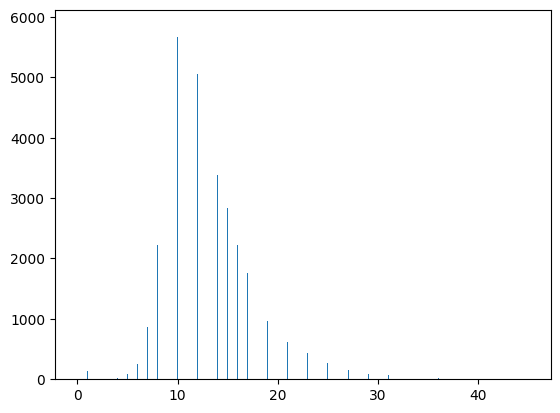

In [42]:
plt.hist([len(x) for x in X],bins=700)

In [43]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

0

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [45]:
maxlen=1000
X=pad_sequences(X,maxlen=maxlen)

In [46]:
len(X[0])

1000

In [47]:
vocab=tokenizer.word_index

In [48]:
vocab_size=len(tokenizer.word_index)+1

In [49]:
def get_wt_matrix(model):
    weight_matrix=np.zeros((vocab_size,DIM))
    for word,i in vocab.items():
        weight_matrix[i]=model.wv[word]
    return weight_matrix

In [50]:
embedding_vectors=get_wt_matrix(w2v_model)

In [51]:
embedding_vectors.shape

(20914, 100)

**Trained On 'Title' again rather than 'Text'** to check if better results are obtained

In [54]:
model1=Sequential()
model1.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=maxlen,trainable=False))
model1.add(Dropout(0.2)),
model1.add(LSTM(128,return_sequences=True)),
model1.add(LSTM(128)),
model1.add(Dropout(0.2)),
model1.add(Dense(512)),
model1.add(Dropout(0.2)),
model1.add(Dense(256)),
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         2091400   
                                                                 
 dropout (Dropout)           (None, 1000, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 1000, 128)         117248    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [62]:
history=model1.fit(X_train,y_train,validation_split=0.3,epochs=6)

Epoch 1/6
737/737 [==============================] - 177s 240ms/step - loss: 0.1308 - accuracy: 0.9491 - val_loss: 0.1499 - val_accuracy: 0.9419
Epoch 2/6
737/737 [==============================] - 176s 239ms/step - loss: 0.1233 - accuracy: 0.9522 - val_loss: 0.1337 - val_accuracy: 0.9478
Epoch 3/6
737/737 [==============================] - 175s 238ms/step - loss: 0.1217 - accuracy: 0.9525 - val_loss: 0.1323 - val_accuracy: 0.9494
Epoch 4/6
737/737 [==============================] - 175s 238ms/step - loss: 0.1145 - accuracy: 0.9553 - val_loss: 0.1359 - val_accuracy: 0.9497
Epoch 5/6
737/737 [==============================] - 175s 237ms/step - loss: 0.1307 - accuracy: 0.9474 - val_loss: 0.1387 - val_accuracy: 0.9447
Epoch 6/6
737/737 [==============================] - 175s 238ms/step - loss: 0.1096 - accuracy: 0.9567 - val_loss: 0.1502 - val_accuracy: 0.9451


### Results weren't as good as compared to training on text
And the reason is pretty clear as more the data the better the results
- Still our accuracy was near 95% in 10 epochs and 93% in 6 epochs which could be considered pretty well

In [63]:
y_pred=(model1.predict(X_test)>=0.5).astype(int)

351/351 [==============================] - 29s 82ms/step


In [64]:
accuracy_score(y_test,y_pred)

0.9397772828507795

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5874
           1       0.95      0.92      0.94      5351

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



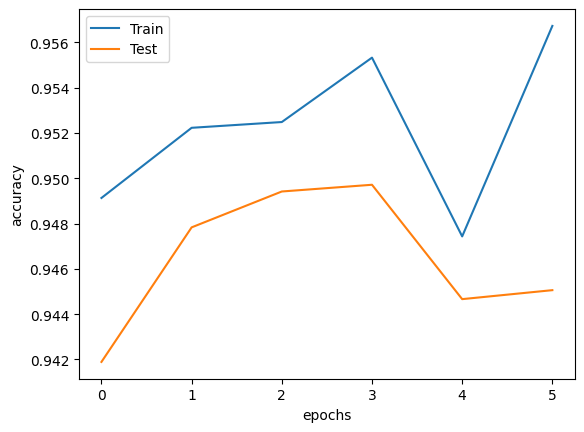

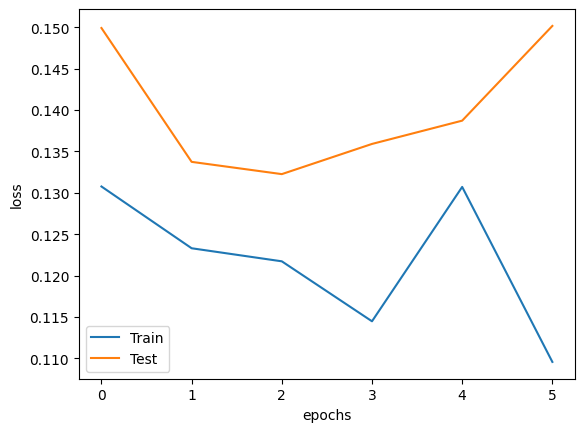

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.savefig('word2vecAcc.png')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.savefig('word2vecLoss.png')
plt.show()

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_keras = model1.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras= auc(fpr_keras, tpr_keras)

351/351 [==============================] - 29s 84ms/step


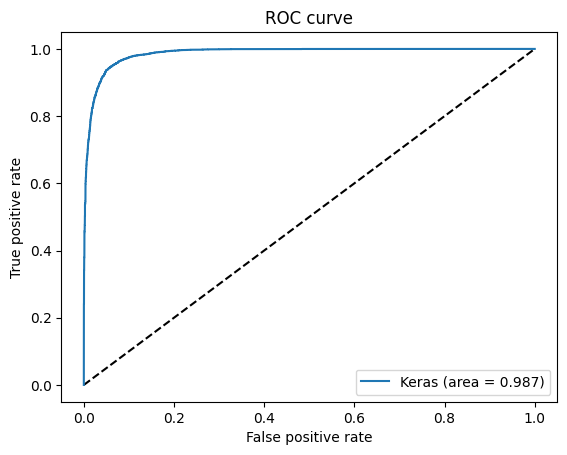

In [110]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('ROCcurveW2vTitle.png')
plt.show()


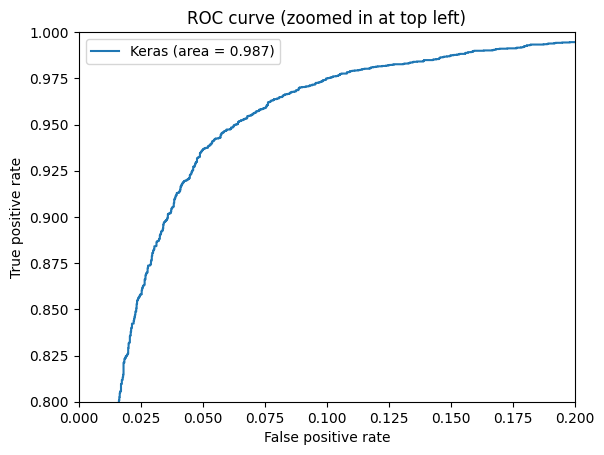

In [111]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.savefig('ROCcurveW2vTitleZoomed.png')
plt.show()

In [75]:
model1.save('word2vecModelTitle.h5')

In [ ]:
z=str(input())
x=['{}'.format(z)]
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)
(model1.predict(x))

### Glove Representations


Glove Embeddings can be downloaded from here <a>https://www.kaggle.com/datasets/rtatman/glove-global-vectors-for-word-representation/download?datasetVersionNumber=1</a>

In [100]:
X=[d.split() for d in df['title'].tolist()]
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)
word_index=tokenizer.word_index
vocab_size=len(word_index)
vocab_size

20913

In [101]:
X=tokenizer.texts_to_sequences(X)
padded_X=pad_sequences(X,maxlen=maxlen)

In [102]:
embedding_index={}
with open('Glove/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values=line.split()
        word=values[0]
        coeff=np.asarray(values[1:],dtype='float32')
        embedding_index[word]=coeff
        

In [103]:
embedding_matrix=np.zeros((vocab_size+1,100))
for word,i in word_index.items():
    embedding_vector2=embedding_index.get(word)
    if embedding_vector2 is not None:
        embedding_matrix[i]=embedding_vector2

In [104]:
X_train,X_test,y_train,y_test=train_test_split(padded_X,df['class'],test_size=0.2,random_state=42,stratify=df['class'])

In [105]:
model=Sequential([
    Embedding(vocab_size+1,100,weights=[embedding_matrix],trainable=False),
    Dropout(0.2),
    LSTM(128,return_sequences=True),
    LSTM(128),
    Dropout(0.2),
    Dense(512),
    Dropout(0.2),
    Dense(256),
    Dense(1,activation='sigmoid')
])

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         2091400   
                                                                 
 dropout_3 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         117248    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dropout_5 (Dropout)         (None, 512)              

In [107]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [108]:
history=model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/10
281/281 [==============================] - 127s 444ms/step - loss: 0.2119 - accuracy: 0.9135 - val_loss: 0.1736 - val_accuracy: 0.9312
Epoch 2/10
281/281 [==============================] - 124s 442ms/step - loss: 0.1633 - accuracy: 0.9354 - val_loss: 0.1334 - val_accuracy: 0.9477
Epoch 3/10
281/281 [==============================] - 124s 442ms/step - loss: 0.1308 - accuracy: 0.9487 - val_loss: 0.1120 - val_accuracy: 0.9553
Epoch 4/10
281/281 [==============================] - 123s 439ms/step - loss: 0.1138 - accuracy: 0.9548 - val_loss: 0.1051 - val_accuracy: 0.9588
Epoch 5/10
281/281 [==============================] - 123s 437ms/step - loss: 0.0997 - accuracy: 0.9622 - val_loss: 0.0913 - val_accuracy: 0.9646
Epoch 6/10
281/281 [==============================] - 123s 438ms/step - loss: 0.0896 - accuracy: 0.9655 - val_loss: 0.0910 - val_accuracy: 0.9667
Epoch 7/10
281/281 [==============================] - 125s 444ms/step - loss: 0.0823 - accuracy: 0.9681 - val_loss: 0.1062 -

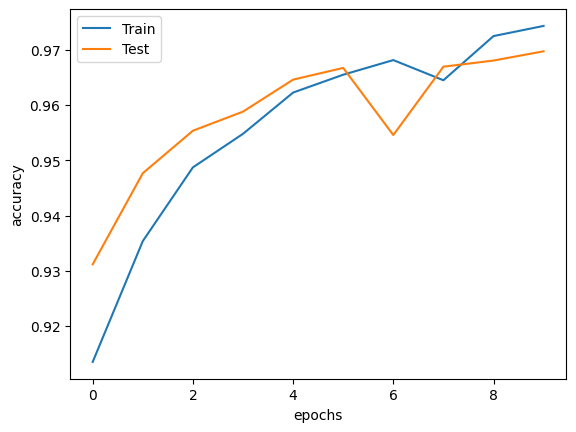

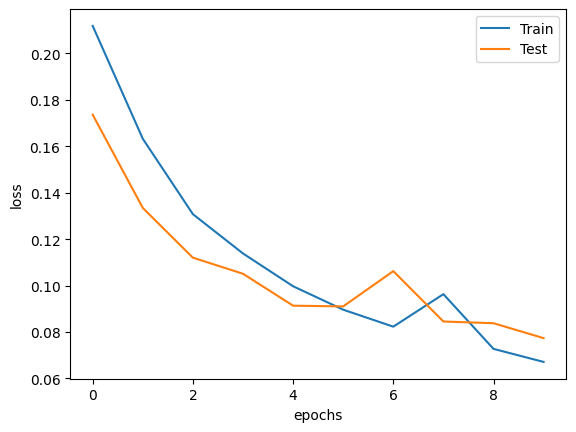

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.show()

281/281 [==============================] - 27s 86ms/step


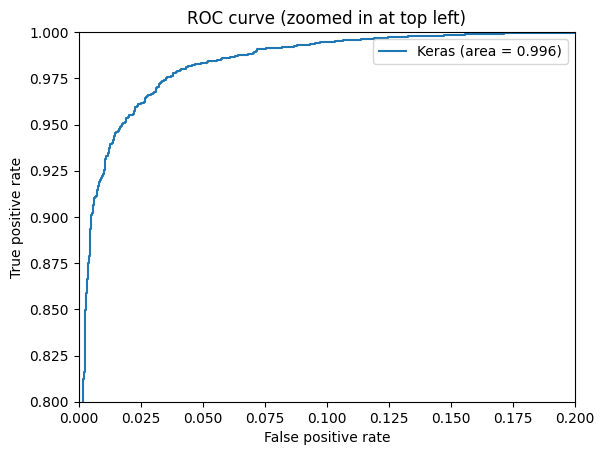

In [112]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras= auc(fpr_keras, tpr_keras)
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.savefig('ROCcurveGloveTitleZoomed.png')
plt.show()

In [116]:
y_pred=(model.predict(X_test)>=0.5).astype(int)

281/281 [==============================] - 24s 85ms/step


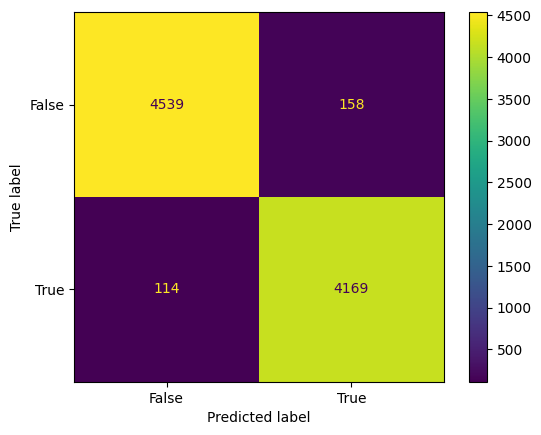

In [119]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.savefig('confusionMatrixGloveTitle.png')
plt.show()

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4697
           1       0.96      0.97      0.97      4283

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



In [113]:
model.save('GloveModel.h5')

In [114]:
z=str(input())
x=['{}'.format(z)]
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)
(model1.predict(x))

Since deep learning models can take hours, days, and even weeks to train, it is important to know how to save and load them from a disk.  In this post, you will discover how to save your Keras models to files and load them up again to make predictions.
1/1 [==============================] - 0s 99ms/step


array([[2.713588e-08]], dtype=float32)